In [ ]:
!wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip


In [ ]:
!unzip data.zip

In [ ]:
!pip install tensorflow==2.17.1

In [4]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

import matplotlib.pyplot as plt

In [5]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

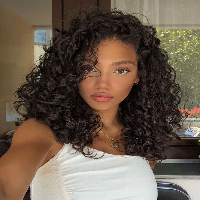

In [6]:
path = './data/train/curly'
name = '00cbad1ffe22d900018e5a2e7376daed4.jpg'
img = load_img(f'{path}/{name}', target_size=(200, 200))
img

In [7]:
# Define the CNN model
model = Sequential([
    Input(shape=(200, 200, 3)),  # Define the input shape explicitly
    # Convolutional layer
    Conv2D(32, (3, 3), activation='relu'), # 32 filters, (3, 3) Kernel size
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer reduce to (2, 2)
    Flatten(), # Turn the multi-dimensional result into vectors
    Dense(64, activation='relu'), # `Dense` layer with 64 neurons

    # Output layer for binary classification
    Dense(1, activation='sigmoid')  # `Dense` layer with 1 neuron
])

# Compile the model
optimizer = SGD(learning_rate=0.002, momentum=0.8)
# Define loss function with from_logits=True
loss = BinaryCrossentropy(from_logits=False)

# Compile model
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 313632)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      20,072,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# alternative form
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
sgd_opt = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy(from_logits=False)
model.compile(optimizer=sgd_opt, loss=loss, metrics=['accuracy'])
# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 313632)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │      20,072,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

* `mean squared error`
* `binary crossentropy` <--
* `categorical crossentropy`
* `cosine similarity`

### Question 2

What's the total number of parameters of the model? You can use the `summary` method for that.

* 896
* 11214912
* 15896912
* 20072512 <--

### Generators and Training

In [8]:
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

In [9]:
train_dir = 'data/train'
test_dir = 'data/test'

In [10]:
train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 800 images belonging to 2 classes.


In [11]:
validation_generator = val_gen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True,
)

Found 201 images belonging to 2 classes.


In [12]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 0.5650 - loss: 0.7255 - val_accuracy: 0.5572 - val_loss: 0.6738
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - accuracy: 0.6448 - loss: 0.6383 - val_accuracy: 0.6219 - val_loss: 0.6379
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.7036 - loss: 0.5962 - val_accuracy: 0.6269 - val_loss: 0.6525
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.6914 - loss: 0.5811 - val_accuracy: 0.6318 - val_loss: 0.6217
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.6844 - loss: 0.5795 - val_accuracy: 0.6119 - val_loss: 0.6500
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.7140 - loss: 0.5578 - val_accuracy: 0.6368 - val_loss: 0.6149
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.7095 - loss: 0.5648 - val_accuracy: 0.6418 - val_loss: 0.6160
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.7318 - loss: 0.5389 - val_accuracy: 0.6318 - va

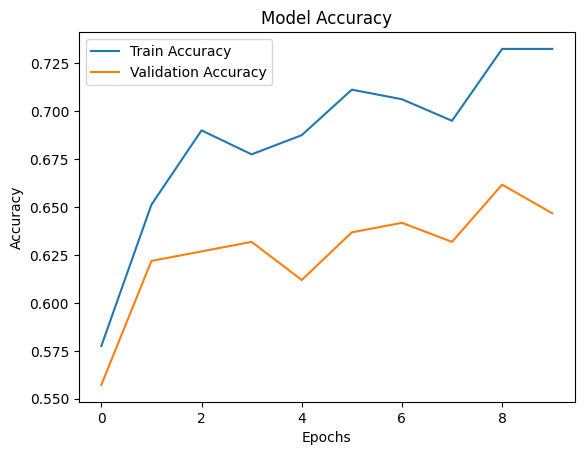

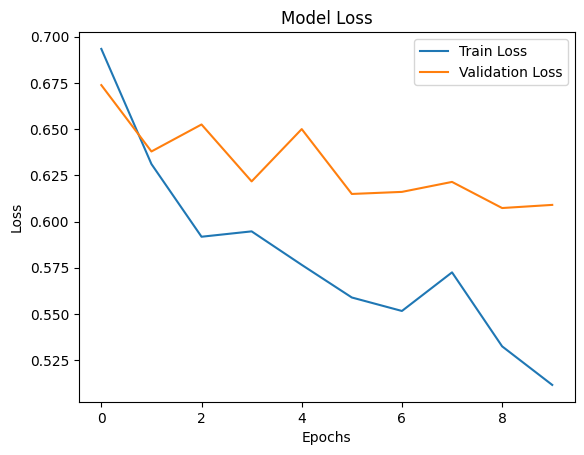

In [19]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

### Question 3. Median of training accuracy for all the epochs (1 point)
* 0.10
* 0.32
* 0.50
* 0.72

In [21]:
from numpy import median
print("Median training accuracy:", median(history.history['accuracy']))

Median training accuracy: 0.6924999952316284


### Question 4
#### What is the standard deviation of training loss for all the epochs for this model?
* 0.028
* 0.068
* 0.128
* 0.168

In [23]:
print("Standard deviation of training loss:", np.std(history.history['loss']))

Standard deviation of training loss: 0.04902288166285968


### Data Augmentation

In [24]:
train_gen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator_augmented = train_gen_augmented.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 800 images belonging to 2 classes.


In [25]:
# Train the model
history_augmented = model.fit(
    train_generator_augmented,            # Training data generator
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 283ms/step - accuracy: 0.6111 - loss: 0.6529 - val_accuracy: 0.6418 - val_loss: 0.5962
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 241ms/step - accuracy: 0.6673 - loss: 0.6157 - val_accuracy: 0.6766 - val_loss: 0.6029
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 285ms/step - accuracy: 0.6651 - loss: 0.6097 - val_accuracy: 0.6418 - val_loss: 0.5929
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 269ms/step - accuracy: 0.6473 - loss: 0.6155 - val_accuracy: 0.6567 - val_loss: 0.5867
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 281ms/step - accuracy: 0.6714 - loss: 0.5999 - val_accuracy: 0.6716 - val_loss: 0.5926
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 268ms/step - accuracy: 0.6771 - loss: 0.5841 - val_accuracy: 0.6468 - val_loss: 0.5809
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 280ms/step - accuracy: 0.6689 - loss: 0.5971 - val_accuracy: 0.6766 - val_loss: 0.5863
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 294ms/step - accuracy: 0.6842 - loss: 0.5879 - val_accuracy: 0.661

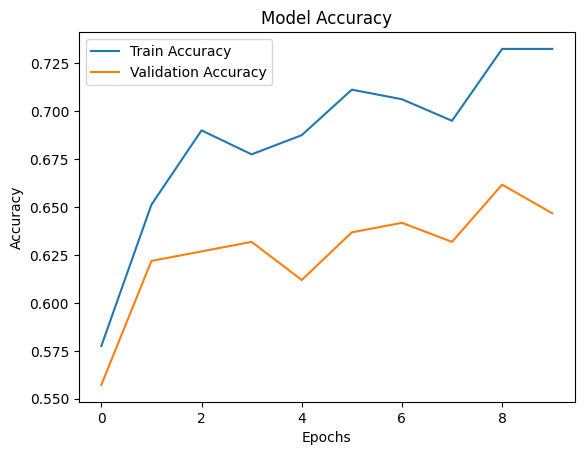

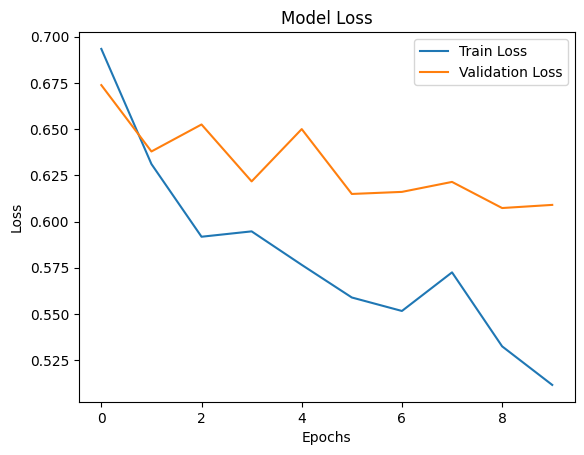

In [29]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

### Question 5

What is the mean of test loss for all the epochs for the model trained with augmentations?

* 0.26
* 0.56
* 0.86
* 1.16


In [30]:
mean_val_loss_augmented = np.mean(history_augmented.history['val_loss'])
print("Mean test loss for augmented model:", mean_val_loss_augmented)

Mean test loss for augmented model: 0.5902180552482605


### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

* 0.31
* 0.51
* 0.71
* 0.91

In [31]:
last_5_val_acc_augmented = history_augmented.history['val_accuracy'][-5:]
average_val_acc_last_5 = np.mean(last_5_val_acc_augmented)
print("Average test accuracy for the last 5 epochs:", average_val_acc_last_5)

Average test accuracy for the last 5 epochs: 0.667661702632904
